In [ ]:
from configparser import ConfigParser

config = ConfigParser()
config.read('config.ini')

int(config['augmentations']['sample_rate'])

In [ ]:
from model import ResNet18
import torch, torchaudio
from AudioDataset import AudioDataset
from pathlib import Path
# load back the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn = ResNet18.to(device)

model_paths = [str(p) for p in Path('./saved_model/').glob(f'*.pt')]
for i, model_path in enumerate(model_paths):
    print(f'[{i}] {model_path}')

path = model_paths[int(input('Select saved model > '))]
state_dict = torch.load(path, map_location=device)['model_state_dict']
cnn.load_state_dict(state_dict)

torch.save(cnn, './saved_model/NoAugmentations44K.pt')


<AxesSubplot: >

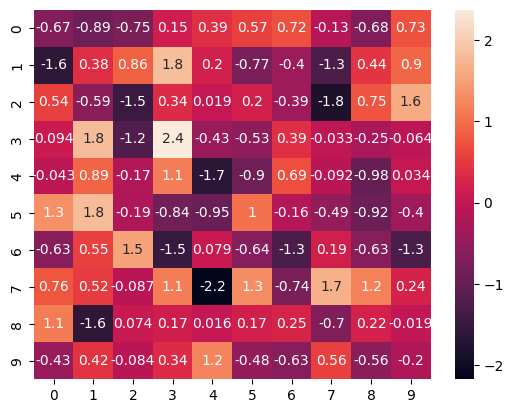

In [11]:
import torch
import seaborn as sn
a= torch.randn([10,10]).to('cuda')
sn.heatmap(a.to('cpu'), annot=True)